### 0. Introduction
This ipynb file is to instruct how to visualize the results of analysis


### 1. Settings colors and directories
run the following two cells to set colors

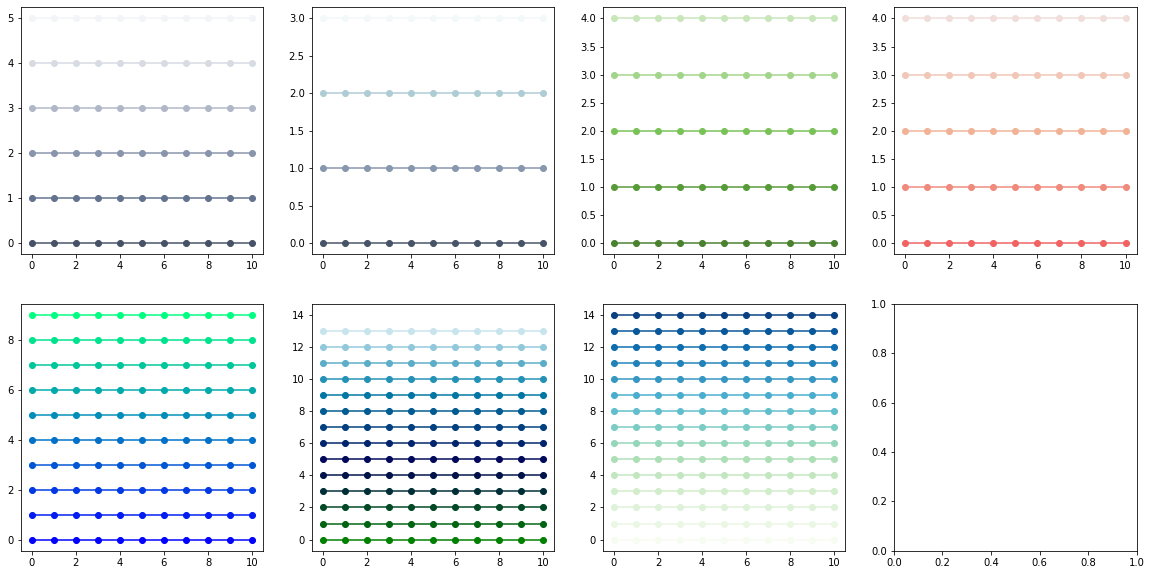

In [1]:
import re
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import matthews_corrcoef, confusion_matrix, f1_score, roc_auc_score, auc, precision_recall_curve
import seaborn as sns
from scipy.stats import wilcoxon
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl
#return manually defined colormap

def generate_cmap(colors):
    values = range(len(colors))

    vmax = np.ceil(np.max(values))
    color_list = []
    for v, c in zip(values, colors):
        color_list.append( ( v/ vmax, c) )
    return LinearSegmentedColormap.from_list('custom_cmap', color_list)

clist_darkblue = ['#475267', '#63728e', '#8895ac', '#b0b8c8', '#d7dce3', '#f3f4f7']
clist_green = ['#49812f', '#579b38', '#79c257', '#a2d58b', '#c7e6b9']
clist_red = ['#F16262', '#f18a7c', '#F1B296', '#f1c7b7', '#F1DDD9']

clist_powerpoint = ['#475468', '#8797AD', '#AECCD4', '#F3F8F9']


fig, ax = plt.subplots(2,4,figsize=(20,10))
x = np.linspace(0,10,11)
for i in range(len(clist_darkblue)):
    y = np.full(len(x), i)
    ax[0,0].plot(x, y, marker='o', linestyle='-', color=clist_darkblue[i])

for i in range(len(clist_powerpoint)):
    y = np.full(len(x), i)
    ax[0,1].plot(x, y, marker='o', linestyle='-', color=clist_powerpoint[i])
    
for i in range(len(clist_green)):
    y = np.full(len(x), i)
    ax[0,2].plot(x, y, marker='o', linestyle='-', color=clist_green[i])
    
for i in range(len(clist_red)):
    y = np.full(len(x), i)
    ax[0,3].plot(x, y, marker='o', linestyle='-', color=clist_red[i])

clist_winter = []
cmap_winter = plt.get_cmap('winter',10)
for i in range(cmap_winter.N):
    y = np.full(len(x), i)
    ax[1,0].plot(x, y, marker='o', linestyle='-', color=cmap_winter(i))
    clist_winter.append(cmap_winter(i)[:-1])

clist_ocean = []
cmap_ocean = plt.get_cmap('ocean',15)
for i in range(cmap_ocean.N):
    y = np.full(len(x), i)
    ax[1,1].plot(x, y, marker='o', linestyle='-', color=cmap_ocean(i))
    clist_ocean.append(cmap_ocean(i)[:-1])

clist_gnbu = []
cmap_gnbu = plt.get_cmap('GnBu',15)
for i in range(cmap_gnbu.N):
    y = np.full(len(x), i)
    ax[1,2].plot(x, y, marker='o', linestyle='-', color=cmap_gnbu(i))
    clist_gnbu.append(cmap_gnbu(i)[:-1])

#bert_kmer_colors = np.array(clist_ocean[10:14][::-1])
#bert_kmer_swarms = np.tile(clist_powerpoint[0], 4)
bert_models_colors = [clist_gnbu[6],clist_gnbu[7], clist_gnbu[8], clist_gnbu[9], clist_ocean[10]]
bert_models_swarms = np.tile(clist_powerpoint[0], 5)
#print(np.array(clist_ocean[10]) * 255)

In [2]:
def set_custom_colormap(name: str, color_list: list):

    cmap_dis = mpl.colors.ListedColormap(color_list)
    cmap_seq = mpl.colors.LinearSegmentedColormap.from_list(name, color_list)

    plt.register_cmap(name + '_dis', cmap_dis)
    plt.register_cmap(name + '_dis_r', cmap_dis.reversed())
    plt.register_cmap(name + '_seq', cmap_seq)
    plt.register_cmap(name + '_seq_r', cmap_seq.reversed())
    return

COLORMAP_SOURCE_DICT = {

    'bertrbp_single_graphprot': ['#FFFFFF', '#a3f5f5'], #light blue
    'bertrbp_single_ideepS': ['#FFFFFF', '#f4e7b2'], #cream yellow
    'bertrbp_single_hocnnlb': ['#FFFFFF', '#95D6BB'], #faded green
    'bertrbp_single_baseline': ['#bff9f9','#FFFFFF','#F16262'], #red f47f7f
    #'bertrbp_single_bertrbp': ['#e8a38c', '#f7e0d9','#FFFFFF', '#2083a4', '#175e75'], #blue 3db2d9
    'bertrbp_single_bertrbp': ['#adadad','#fcfcfc', '#fb5d0e'], #blue 3db2d9 #e69166
    'bertrbp_single_bertbaseline': ['#adb9ca','#fcfcfc', '#50d284'], #blue 3db2d9 
    'bertrbp_single_bertdnabert': ['#adadad','#fcfcfc', '#61ccef'], #blue 3db2d9
    #'bertrbp_single_bertrbp_corr': ['#b2e0f0','#fcfcfc', '#F16262'], #blue 3db2d9
    'bertrbp_single_bertrbp_corr': ['#93cee1','#fcfcfc', '#e86868'], #blue 3db2d9
    'bertrbp_single_bertrbp2': ['#fcfcfc', '#fb5d0e'], #blue 3db2d9
    'bertrbp_single_bertrbp3': ['#fcfcfc', '#44546a'], #blue 3db2d9
    'bertrbp_single_dnabert': ['#e0b4d8', '#FFFFFF', '#47ad59'], #green 54B967

    'bertrbp_accent': ['#51a0c8', '#5ea77e', '#9ff9f9', '#89e1ac', '#fc8b52', '#FFFFFF'],
    'bertrbp_accent2': ['#f4e7b2', '#95D6BB', '#f47f7f', '#3db2d9', '#47ad59', '#FFFFFF'],
    
}

# colormap
for name, color_list in COLORMAP_SOURCE_DICT.items():
    set_custom_colormap(name, color_list)


DEFAULT_COLORMAP = 'bertrbp_accent_dis'

sns.set()
sns.set_palette(DEFAULT_COLORMAP)

Set your directory here. The files will be called as `os.path.join(MASTER_DIR, rbp, SUBDIR, "name_of_the_file.npy")`, so the `MASTER_DIR` should be the direcotry which contains RBP subdirectories.

In [3]:
#MASTER_DIR = "./datasets"
#MASTER_DIR = "./sample_dataset"
MASTER_DIR_DNABERT = "../3-new-12w-0/"
MASTER_DIR = "/home/keisuke-yamada/project_RNA_RBP/01_models/DNABERT/fastafiles/RBPsuite_data/3mer/"
MASTER_DIR = "./sample_dataset"

### 2. Visualize region type analysis
You can visualize multiple RBPs at one time by specifying their names in `rbps`. `SUBDIR` and `SUBDIR_BASELINE` are where you have saved the results of region type analysis.

In [5]:
rbps = ('TIAL1',)
regiontypes = ("5'UTR", "3'UTR", "intron", "CDS")
index_regiontypes = {"5'UTR":0, "3'UTR":1, "intron":3, "CDS":4}
SUBDIR = "finetuned_model/analyze_regiontype"
SUBDIR_BASELINE = "finetuned_model_baseline/analyze_regiontype" # if you have trained the BERT-baseline
VISUALIZE = True

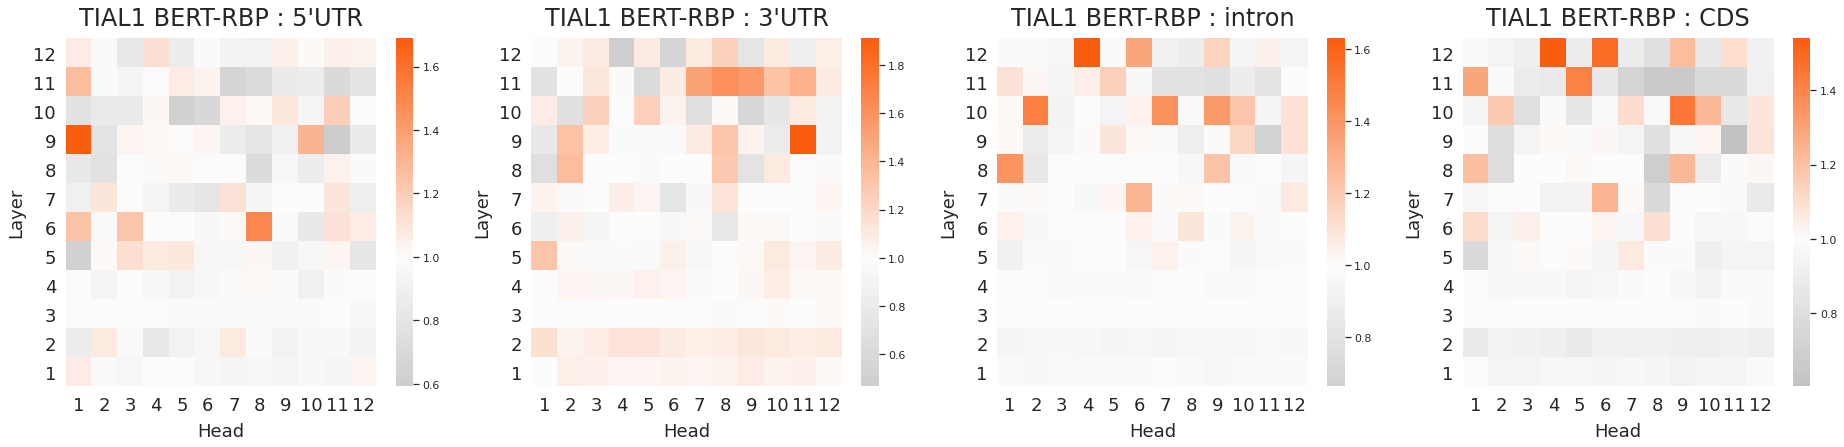

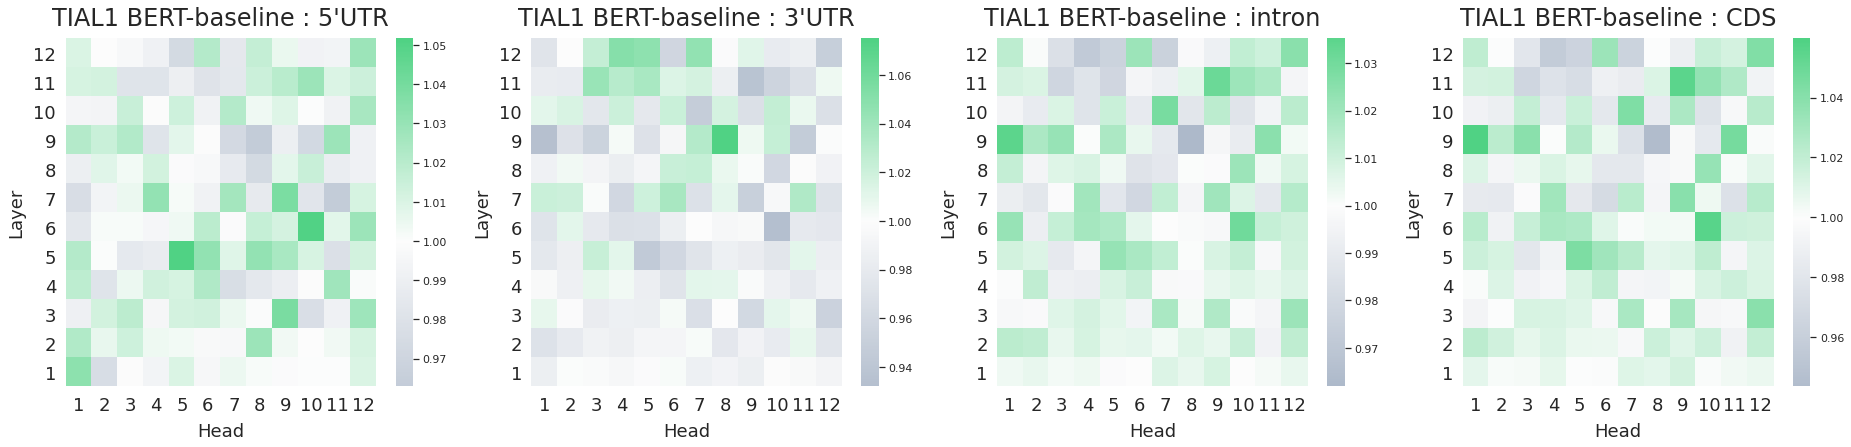

In [6]:
ax_i = len(rbps)
if ax_i < 2:
    ax_i = 1
ax_j = len(regiontypes)
heatmap_xlabels = list(map(int, np.linspace(1,12,12)))
heatmap_ylabels = heatmap_xlabels[::-1]

for rbp in rbps:
    fig, ax = plt.subplots(ax_i, ax_j, figsize=(ax_j*8, ax_i*6.4))
    filename = os.path.join(MASTER_DIR, rbp, SUBDIR, "analyze_regiontype_type0.npy")
    regiontype_matrix = np.load(filename)
    for num_region, regiontype in enumerate(regiontypes):
        index = index_regiontypes[regiontype]
        sns.heatmap(np.flip(regiontype_matrix[index], axis=0), ax =ax[num_region],\
                            center=1.0, cmap='bertrbp_single_bertrbp_seq')
        ax[num_region].set_xlabel("Head", fontsize=18, labelpad=8)
        ax[num_region].set_ylabel("Layer", fontsize=18, labelpad=8)
        ax[num_region].set_xticklabels(heatmap_xlabels)
        ax[num_region].set_yticklabels(heatmap_ylabels)
        ax[num_region].tick_params(axis = 'x', labelsize =18)
        ax[num_region].tick_params(axis = 'y', labelsize =18, rotation=0)
        ax[num_region].set_title("{} BERT-RBP : {}".format(rbp, regiontype), fontsize=24, x=0.5, y=1.02)
        fig.patch.set_alpha(0)
        fig.savefig("heatmap_regiontype_specific_{}_{}.eps".format(rbp, regiontype), dpi=350)
    
    filename = os.path.join(MASTER_DIR, rbp, SUBDIR_BASELINE, "analyze_regiontype_type0.npy")
    if os.path.exists(filename):
        fig, ax = plt.subplots(ax_i, ax_j, figsize=(ax_j*8, ax_i*6.4))
        for num_region, regiontype in enumerate(regiontypes):
            regiontype_matrix = np.load(filename)
            index = index_regiontypes[regiontype]
            sns.heatmap(np.flip(regiontype_matrix[index], axis=0), ax =ax[num_region],\
                                center=1.0, cmap='bertrbp_single_bertbaseline_seq')
            ax[num_region].set_xlabel("Head", fontsize=18, labelpad=8)
            ax[num_region].set_ylabel("Layer", fontsize=18, labelpad=8)
            ax[num_region].set_xticklabels(heatmap_xlabels)
            ax[num_region].set_yticklabels(heatmap_ylabels)
            ax[num_region].tick_params(axis = 'x', labelsize =18)
            ax[num_region].tick_params(axis = 'y', labelsize =18, rotation=0)
            ax[num_region].set_title("{} BERT-baseline : {}".format(rbp, regiontype), fontsize=24, x=0.5, y=1.02)
            fig.patch.set_alpha(0)
            fig.savefig("heatmap_regiontype_specific_{}_{}_baseline.eps".format(rbp, regiontype), dpi=350)

### 3. Visualize region type analysis (in detail)
You can visualize multiple RBPs at one time by specifying their names in `rbps`. `SUBDIR` is where you have saved the results of region type analysis.

In [7]:
'''
rbps = ('FUS', 'SRSF1',\
        'QKI', 'IGF2BP1', 'IGF2BP2', 'IGF2BP3', 'U2AF2',\
       'TAF15', 'HNRNPC',\
        'HNRNPL', 'TIAL1', 'TIA1',\
        'EWSR1', 'NSUN2', 'PUM2')
'''
rbps=('TIAL1',)
rbps = sorted(rbps)
regiontypes = ("5'UTR", "3'UTR", "intron", "CDS")
index_regiontypes = {"5'UTR":0, "3'UTR":1, "intron":3, "CDS":4}
SUBDIR = "finetuned_model/analyze_regiontype"
VISUALIZE = True
NUM_BINS = 15
SEQ_LENGTH = 101
VOLUME_PERCENT = 0.995
PLOTSTYLE = "barplot"
NUM_SPLIT=3

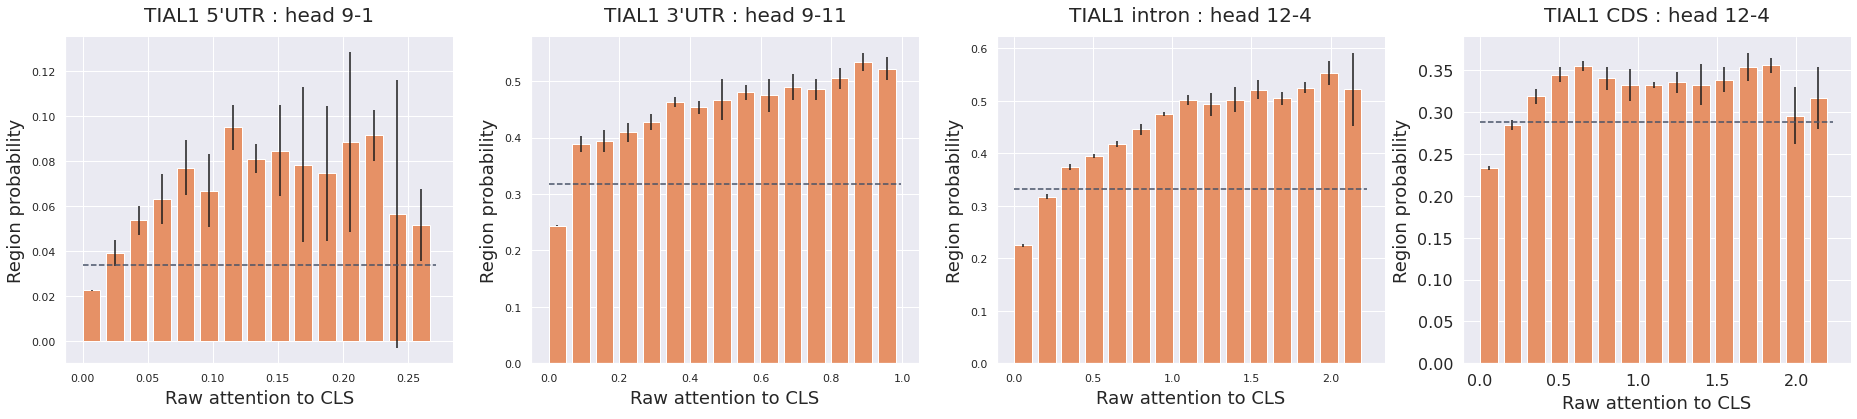

In [8]:
from scipy.stats import spearmanr
ax_i = len(rbps)
ax_j = len(regiontypes)


spearmans = []
for num_rbp, rbp in enumerate(rbps):        
    fig, ax = plt.subplots(1, ax_j, figsize=(ax_j*8, 6))    
    spearman = []
    textfile = os.path.join(MASTER_DIR, rbp, SUBDIR, "analyze_regiontype.txt")
    regions_and_heads = []
    with open(textfile, 'r') as f:
        for line in f:
            region_and_head = []
            if re.match("region_type: [0-9a-zA-Z\']+, max_head: [0-9\-]+", line):
                for regiontype in regiontypes:
                    if regiontype in line:
                        region_and_head.append(index_regiontypes[regiontype]+1)
                        max_head = re.findall("max_head: [0-9\-]+", line)[0]
                        max_head = [int(i) for i in re.findall("[0-9]+", max_head)]
                        region_and_head.extend(max_head)
                        regions_and_heads.append(region_and_head)
                        
    for num_region, regiontype in enumerate(regiontypes):
        for num_maxmin, maxmin in enumerate(["max"]):
            region, layer, head = regions_and_heads[num_region]
            
            filename = "analyze_regiontype_specific_type{}_layer{}_head{}.tsv".format(region, layer, head)
            path = os.path.join(MASTER_DIR, rbp, SUBDIR, filename)
            regiontype_vs_attention = pd.read_csv(path, sep="\t")

            i = num_rbp
            j = num_region
            sns.set()
            sns.set_style('whitegrid')
            sns.despine()
            color = "#2492b6"
            if num_maxmin == 1:
                color = "#F16262"
            
            if PLOTSTYLE=="barplot":
                q_low = 0
                q_high = VOLUME_PERCENT
                quantiles = regiontype_vs_attention["attention"].quantile([q_low, q_high])
                
                attention_max = quantiles[q_high]
                attention_min = quantiles[q_low]                
                attention_thresh = np.linspace(attention_min, attention_max, NUM_BINS+1)
                
                background_x = [attention_min, attention_max]
                background_y = [np.mean(np.array(regiontype_vs_attention)[:,0])/SEQ_LENGTH,\
                                np.mean(np.array(regiontype_vs_attention)[:,0])/SEQ_LENGTH]

                y_value = np.zeros([NUM_SPLIT, NUM_BINS])
                fracs = np.linspace(0,1,NUM_SPLIT+1) * len(regiontype_vs_attention)
                fracs = list(map(int, fracs))
                for num_split, frac in enumerate(fracs[1:]):
                    frac = frac - fracs[num_split]
                    len_df_data = len(regiontype_vs_attention)
                    df_data_split = 0
                    if num_split==NUM_SPLIT-1:
                        df_data_split = regiontype_vs_attention
                    else:
                        df_data_split = regiontype_vs_attention.sample(n=frac, random_state=0)
                    regiontype_vs_attention = regiontype_vs_attention.drop(df_data_split.index)
                    df_data_split = np.array(df_data_split)
                    
                    regiontype_values = np.zeros([NUM_BINS])
                    count = np.zeros([NUM_BINS])
                    for data_point in df_data_split:
                        for bins in range(1, len(attention_thresh)):
                            if bins==1 and data_point[1] >= attention_thresh[bins-1] and data_point[1] <=attention_thresh[bins]:
                                regiontype_values[bins-1] += data_point[0]
                                count[bins-1] += 1
                            elif data_point[1] > attention_thresh[bins-1] and data_point[1] <=attention_thresh[bins]:
                                regiontype_values[bins-1] += data_point[0]
                                count[bins-1] += 1
                    y_value[num_split] = regiontype_values / count / SEQ_LENGTH
                y_err = np.std(y_value, axis=0)
                y_value = np.mean(y_value, axis=0)
                
                spearman.append(spearmanr(attention_thresh[:-1], y_value))

                # print(count)
                # print(regiontype_values)
                
                if NUM_SPLIT==1:
                    ax[j].bar(attention_thresh[:-1], y_value, width=(attention_max-attention_min)*0.05, align="edge", color="#e69166")#e7a888
                else:
                    ax[j].bar(attention_thresh[:-1], y_value, yerr=y_err, width=(attention_max-attention_min)*0.05, align="edge", color="#e69166")
                ax[j].plot(background_x, background_y, '--', label="background", color="#475267")
                ax[j].set_ylabel("Region probability", fontsize=18, labelpad=6)
            elif PLOTSTYLE=="scatterplot":
                regiontype_vs_attention = np.array(regiontype_vs_attention)
                ax[j].plot(regiontype_vs_attention[:,1], regiontype_vs_attention[:,0], 'o', color=color)
                ax[j].set_ylabel("region value")
            
            ax[j].set_xlabel("Raw attention to CLS", fontsize=18, labelpad=6)
            ax[j].set_title("{} {} : head {}-{}".format(rbp, regiontypes[num_region], layer, head), fontsize=20, x=0.5, y=1.03)
            plt.xticks(fontsize =16)
            plt.yticks(fontsize =16)
            
    fig.patch.set_alpha(0)
    fig.savefig("graph_regiontype_{}.eps".format(rbp), dpi=350)
    spearmans.append(spearman)

### 4. Visualize region boundary analysis
You can visualize multiple RBPs at one time by specifying their names in `rbps`. `SUBDIR` and `SUBDIR_DNABERT` are where you have saved the results of region type analysis.

In [9]:
rbps = ('EWSR1',)
rbps = sorted(rbps)
regiontypes = ("5'UTR", "3'UTR", "exon", "intron", "CDS", "outside")
regionboundaries = [[1,4],[0,4],[3,4],[0,3],[1,3]]
SUBDIR = "finetuned_model/analyze_regionboundary"
SUBDIR_DNABERT = "analyze_regionboundary"
VISUALIZE = True

EWSR1


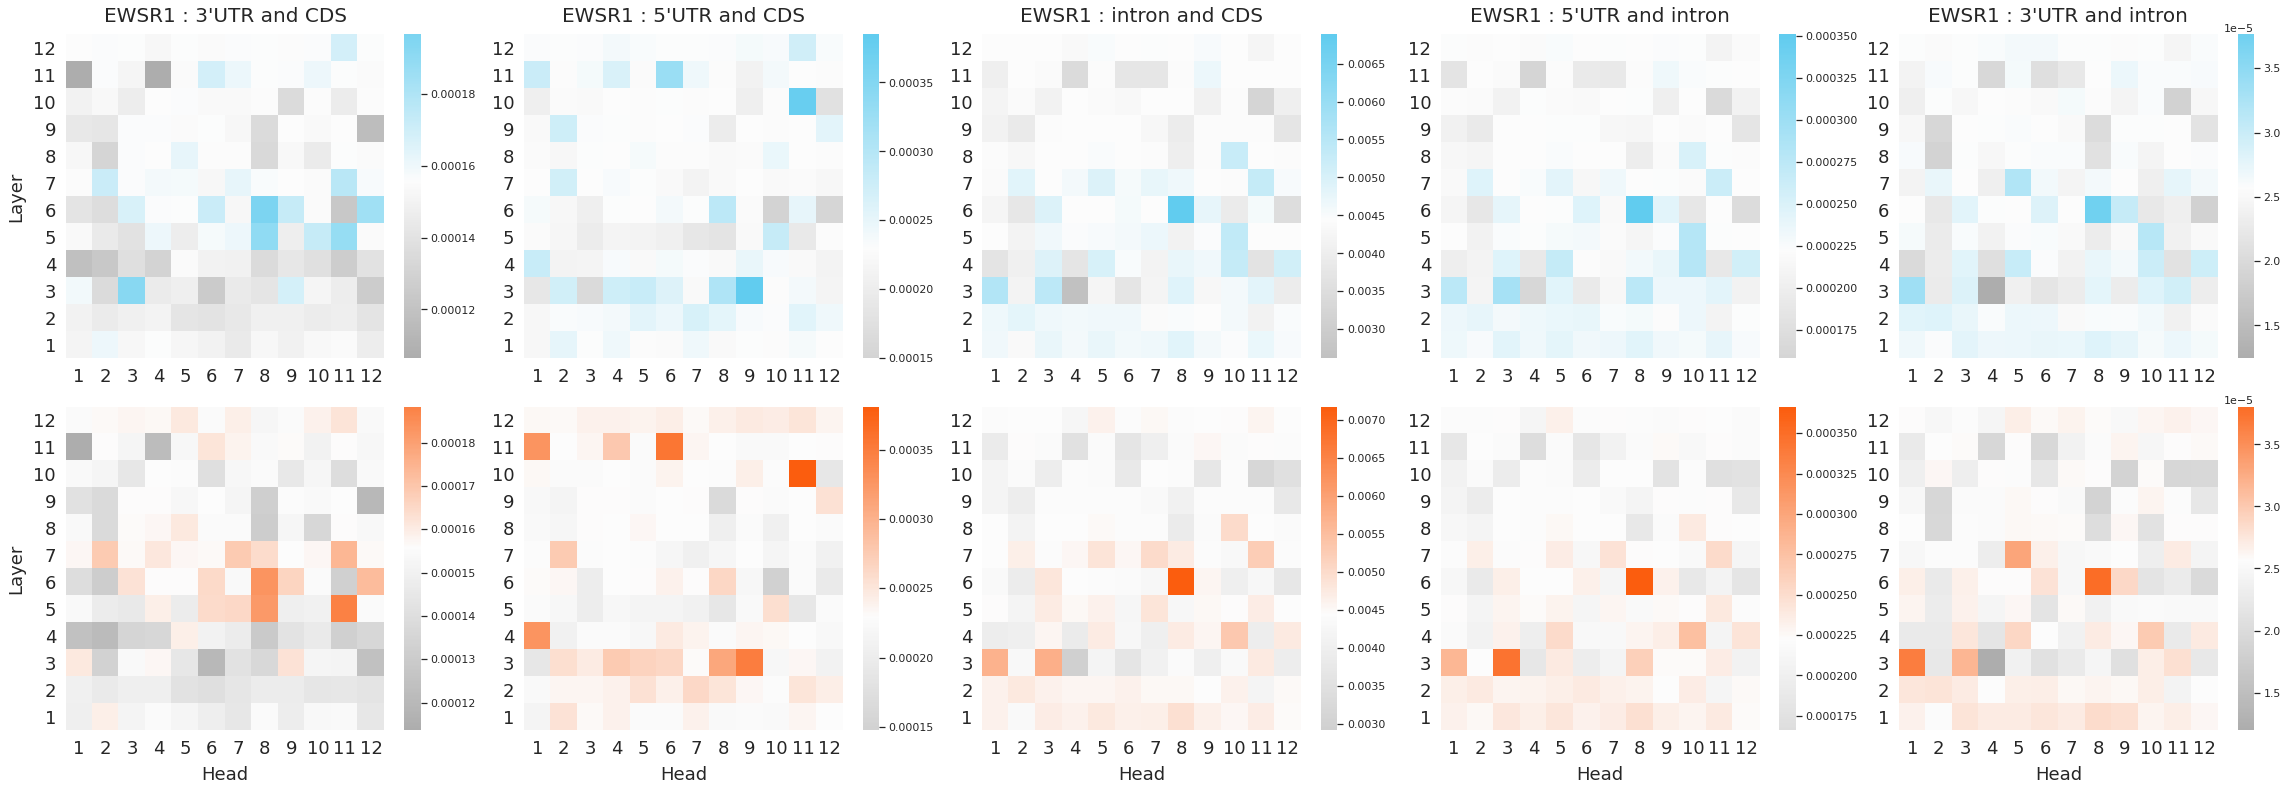

In [10]:
ax_i = 2
ax_j = len(regionboundaries)
fig, ax = plt.subplots(ax_i, ax_j, figsize=(ax_j*8, ax_i*6.4))
heatmap_xlabels = list(map(int, np.linspace(1,12,12)))
heatmap_ylabels = heatmap_xlabels[::-1]

for num_rbp, rbp in enumerate(rbps):
    print(rbp)
    filename = os.path.join(MASTER_DIR, rbp, SUBDIR, "analyze_regionboundary_all2.npy")
    filename2 = os.path.join(MASTER_DIR_DNABERT, rbp, SUBDIR_DNABERT, "analyze_regionboundary_all2.npy")    
    regiontype_matrix = np.load(filename)
    if os.path.exists(filename2):
        regiontype_matrix2 = np.load(filename2)
    
    filename = os.path.join(MASTER_DIR, rbp, SUBDIR, "analyze_regionboundary_count_all.npy")
    counts = np.load(filename)
    filename = os.path.join(MASTER_DIR, rbp, SUBDIR, "analyze_regionboundary_count_negative_all.npy")
    counts = counts / np.load(filename)
    
    if os.path.exists(filename2):
        filename = os.path.join(MASTER_DIR_DNABERT, rbp, SUBDIR_DNABERT, "analyze_regionboundary_count_all.npy")
        counts2 = np.load(filename)
        filename = os.path.join(MASTER_DIR_DNABERT, rbp, SUBDIR_DNABERT, "analyze_regionboundary_count_negative_all.npy")
        counts2 = counts2 / np.load(filename)
    
    #print(regiontype_matrix.shape)
    #max_heads = []
    for num_boundary, regionboundary in enumerate(regionboundaries):
        region1 = regiontypes[regionboundary[0]]
        region2 = regiontypes[regionboundary[1]]
        
        #max_val = np.max(regiontype_matrix[num_boundary])
        #max_heads.append((np.where(regiontype_matrix[num_boundary]==max_val)[0][0]+1, np.where(regiontype_matrix[num_boundary]==max_val)[1][0]+1))

        if VISUALIZE:
            sns.heatmap(np.flip(regiontype_matrix[num_boundary], axis=0), ax =ax[1, num_boundary],\
                        cmap="bertrbp_single_bertrbp_seq", center=counts[num_boundary])
            ax[1, num_boundary].set_xlabel("Head", fontsize=18, labelpad=8)
            if num_boundary==0:
                ax[1, num_boundary].set_ylabel("Layer", fontsize=18, labelpad=8)
            ax[1, num_boundary].set_xticklabels(heatmap_xlabels, fontsize=18)
            ax[1, num_boundary].set_yticklabels(heatmap_ylabels, fontsize=18, rotation=0)
            #ax[1, num_boundary].set_title("{} BERT-RBP : {} and {}".format(rbp, region1, region2), fontsize=20, x=0.5, y=1.02)
        
        if VISUALIZE and os.path.exists(filename2):
            sns.heatmap(np.flip(regiontype_matrix2[num_boundary], axis=0), ax =ax[0, num_boundary],\
                        cmap="bertrbp_single_bertdnabert_seq", center=counts[num_boundary])
            #ax[0, num_boundary].set_xlabel("Head", fontsize=18, labelpad=8)
            if num_boundary==0:
                ax[0, num_boundary].set_ylabel("Layer", fontsize=18, labelpad=8)
            ax[0, num_boundary].set_xticklabels(heatmap_xlabels, fontsize=18)
            ax[0, num_boundary].set_yticklabels(heatmap_ylabels, fontsize=18, rotation=0)
            #ax[0, num_boundary].set_title("{} DNABERT : {} and {}".format(rbp, region1, region2), fontsize=20, x=0.5, y=1.02)
            ax[0, num_boundary].set_title("{} : {} and {}".format(rbp, region1, region2), fontsize=20, x=0.5, y=1.02)
        fig.subplots_adjust(hspace=0.15, wspace=0.15)
        fig.patch.set_alpha(0)
        #fig.savefig("heatmap_regionboundary_{}_{}-{}.eps".format(rbp, region1, region2), dpi=350)
    fig.savefig("heatmap_regionboundary_{}.eps".format(rbp), dpi=350)


### 5. Visualize region boundary analysis (in detail)
You can visualize multiple RBPs at one time by specifying their names in `rbps`. `SUBDIR` and `SUBDIR_DNABERT` are where you have saved the results of region type analysis. Uncomment `BERTRBP_OR_DNABERT = "DNABERT"` to visualize the results for DNABERT

In [11]:
#RBPS=("EWSR1", "HNRNPL", "IGF2BP1", "IGF2BP2", "IGF2BP3", "NSUN2", "PUM2", "SRSF1", "TIA1")
RBPS=("EWSR1",)
regiontypes = ("5'UTR", "3'UTR", "exon", "intron", "CDS", "outside")
regionboundaries = [[1,4],[0,4],[3,4],[0,3],[1,3]]
SUBDIR = "finetuned_model/analyze_regionboundary"
SUBDIR_DNABERT = "analyze_regionboundary"
tsv_file_original = "analyze_regionboundary_specific_all_layer{}_head{}.tsv"
NUM_SPLIT = 3
VOLUME_PERCENT = 0.995
BERTRBP_OR_DNABERT = "BERTRBP"
#BERTRBP_OR_DNABERT = "DNABERT"

EWSR1
EWSR1
EWSR1


<Figure size 432x288 with 0 Axes>

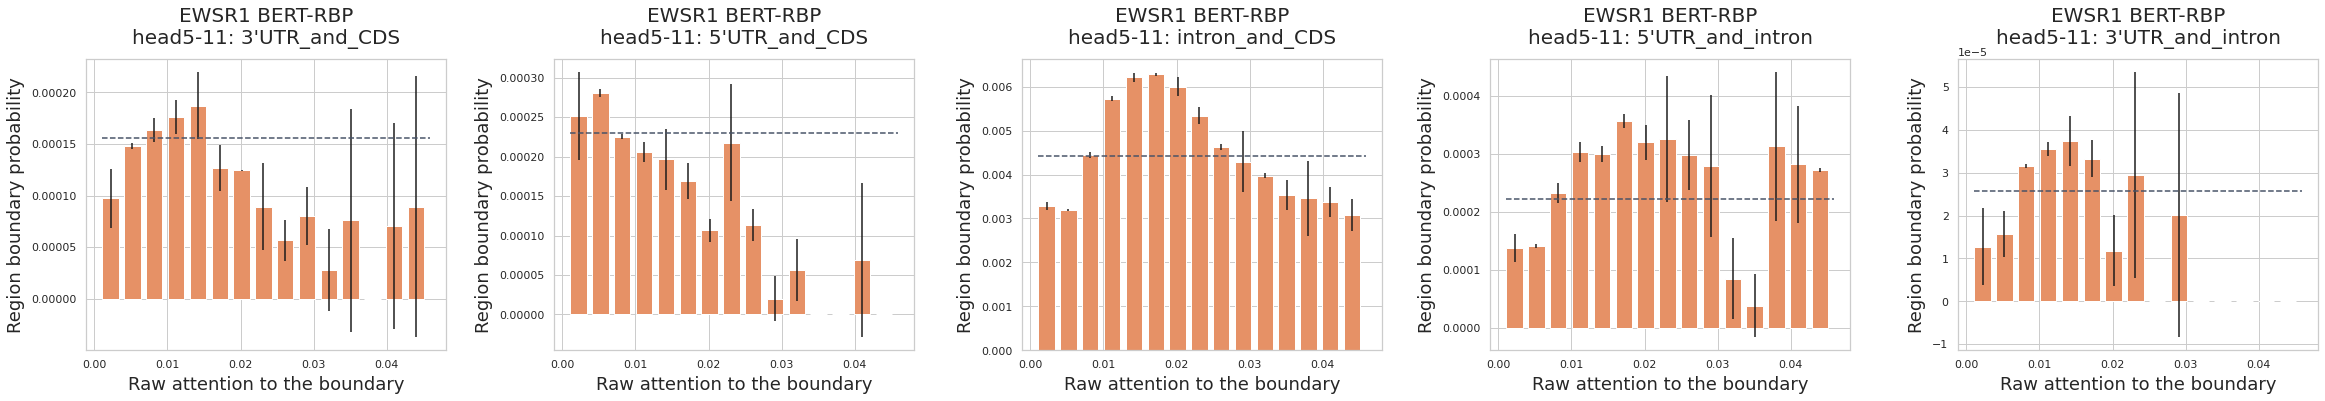

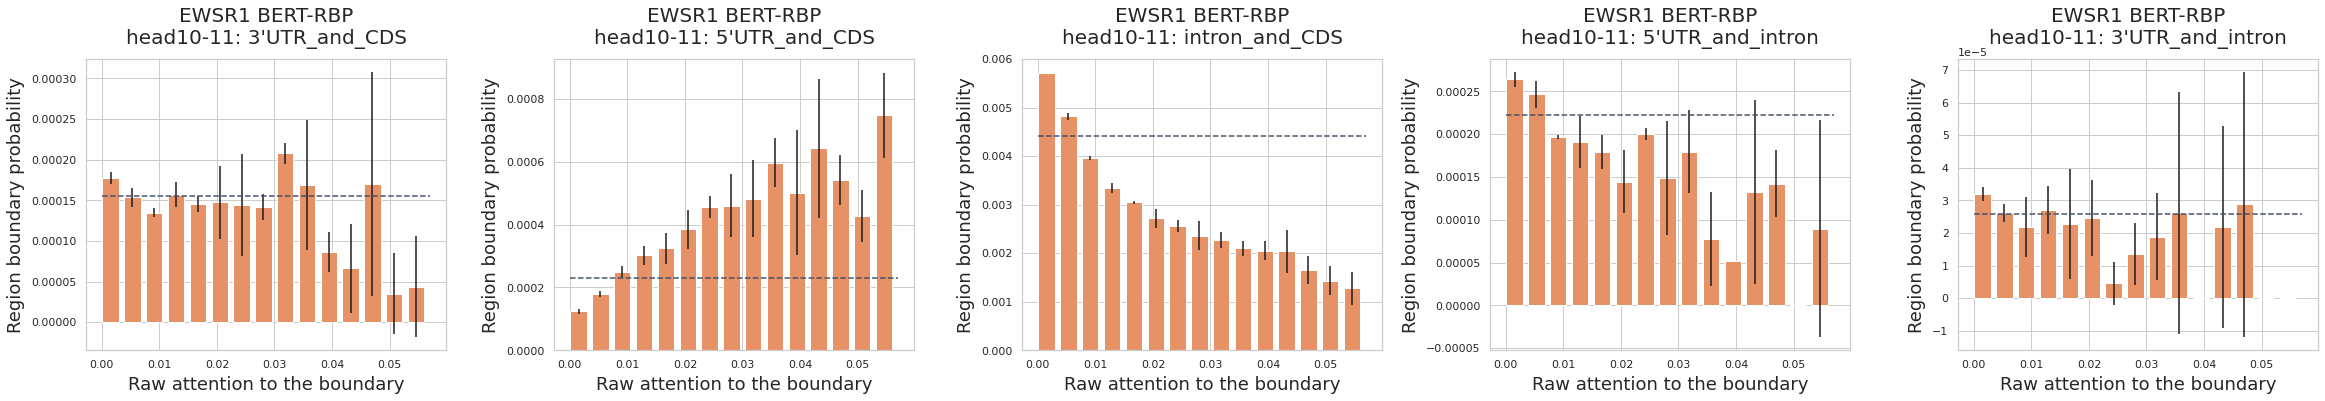

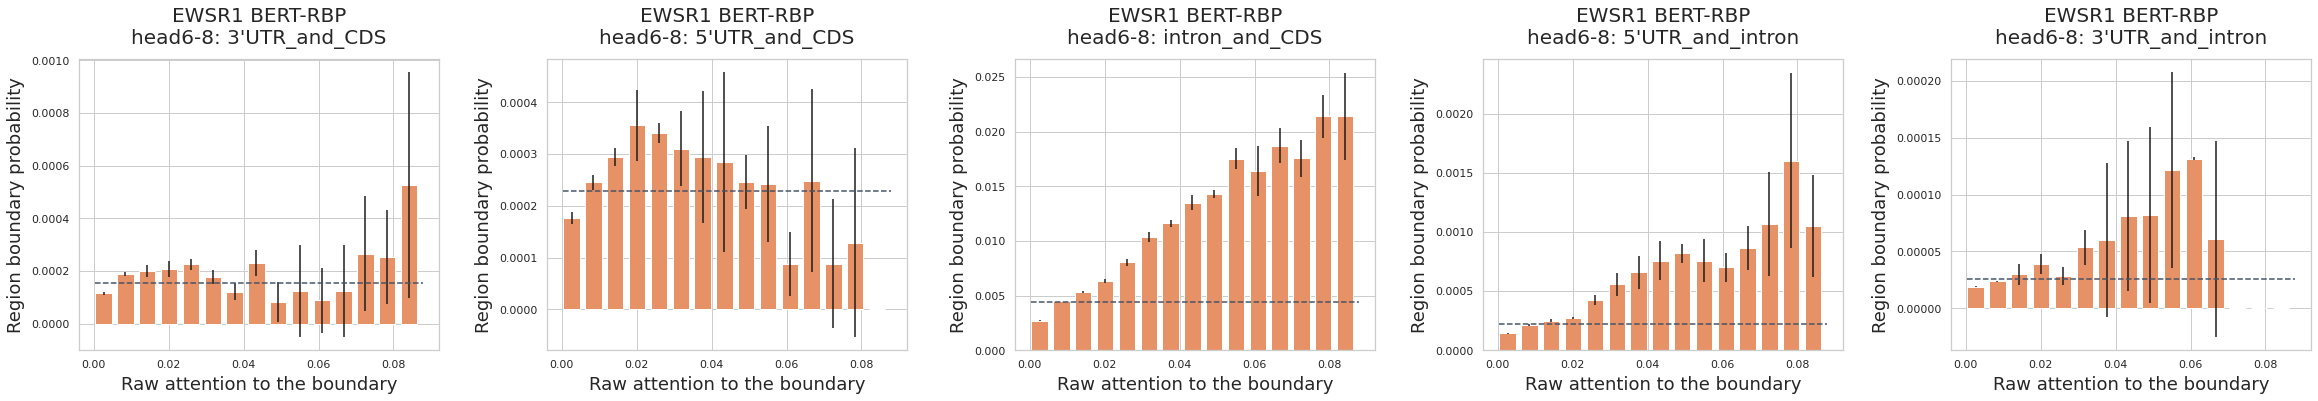

In [12]:
num_data = {}
for RBP in RBPS:
    textfile = os.path.join(MASTER_DIR, rbp, SUBDIR, "analyze_regionboundary.txt")
    regions_and_heads = []
    with open(textfile, 'r') as f:
        for line in f:
            region_and_head = []
            if re.search("max_head: [0-9\-]+", line):
                max_head = re.findall("max_head: [0-9\-]+", line)[0]
                region_and_head = [int(i) for i in re.findall("[0-9]+", max_head)]
                regions_and_heads.append(region_and_head)
    rbps= [RBP] * len(regions_and_heads)

    ax_i = 1
    ax_j = len(regionboundaries)
    heatmap_xlabels = list(map(int, np.linspace(1,12,12)))
    heatmap_ylabels = heatmap_xlabels[::-1]

    sns.set()
    sns.set_style("whitegrid", {'grid.linestyle': '-'})
    sns.despine()

    for num_rbp, rbp in enumerate(rbps):
        fig, ax = plt.subplots(ax_i, ax_j, figsize=(ax_j*8, ax_i*6))
        filename = os.path.join(MASTER_DIR, rbp, SUBDIR, tsv_file_original.format(regions_and_heads[num_rbp][0], regions_and_heads[num_rbp][1]))
        if BERTRBP_OR_DNABERT == "DNABERT":
            filename = os.path.join(MASTER_DIR_DNABERT, rbp, SUBDIR_DNABERT, tsv_file_original.format(regions_and_heads[num_rbp][0], regions_and_heads[num_rbp][1]))
        df_data = pd.read_csv(filename, sep="\t")
        print(rbp)
        if num_rbp == 0:
            num_data[RBP] = len(df_data)

        num_bins= 15
        q_low = 0
        q_high = VOLUME_PERCENT
        quantiles = df_data[df_data["regiontype"]!="outside"]["attention"].quantile([q_low, q_high])
        attention_max = quantiles[q_high]
        attention_min = quantiles[q_low]
        attention_thresh = np.linspace(attention_min, attention_max, num_bins+1)

        counts = np.zeros([NUM_SPLIT, len(regionboundaries), num_bins])
        fracs = np.linspace(0,1,NUM_SPLIT+1) * len(df_data)
        fracs = list(map(int, fracs))
        for num_split, frac in enumerate(fracs[1:]):
            frac = frac - fracs[num_split]
            count = np.zeros([len(regionboundaries), num_bins])
            len_df_data = len(df_data)
            df_data_split = 0
            if num_split==NUM_SPLIT-1:
                df_data_split = df_data
            else:
                df_data_split = df_data.sample(n=frac, random_state=0)
            df_data = df_data.drop(df_data_split.index)
            df_data_split = np.array(df_data_split)
            for i in range(1, len(attention_thresh)):
                tmp1 = df_data_split[:, 1]
                tmp2 = df_data_split[np.where(tmp1 > attention_thresh[i-1])]
                tmp1 = tmp1[np.where(tmp1 > attention_thresh[i-1])]
                tmp2 = tmp2[np.where(tmp1 <= attention_thresh[i])]
                tmp1 = tmp2[:, 0]
                for num_tmp, regionboundary in enumerate(regionboundaries):
                    title = "{}_and_{}".format(regiontypes[regionboundary[0]], regiontypes[regionboundary[1]])
                    if regionboundary[0]==-1:
                        title = "outside"
                    if len(tmp1) == 0:
                        count[num_tmp, i-1] = len(np.where(tmp1==title)[0])
                    else:
                        count[num_tmp, i-1] = len(np.where(tmp1==title)[0]) / len(tmp1)
            counts[num_split] = count
        stds = np.std(counts, axis=0)
        counts = np.mean(counts, axis=0)

        filename = os.path.join(MASTER_DIR, rbp, SUBDIR, "analyze_regionboundary_count_all.npy")
        count_boundary = np.load(filename)
        filename = os.path.join(MASTER_DIR, rbp, SUBDIR, "analyze_regionboundary_count_negative_all.npy")
        count_boundary = count_boundary / (count_boundary + np.load(filename))

        for num_boundary, regionboundary in enumerate(regionboundaries):
            background_x = [attention_min, attention_max]
            background_y = 0
            if regionboundary[0]==-1:
                background_y = [0,0]
            else:
                background_y = [count_boundary[num_boundary]] * 2

            title = "{}_and_{}".format(regiontypes[regionboundary[0]], regiontypes[regionboundary[1]])
            if regionboundary[0]==-1:
                title = "outside"

            y_value = counts[num_boundary]
            if NUM_SPLIT==1:
                ax[num_boundary].bar(attention_thresh[:-1], y_value, width=(attention_max-attention_min)*0.05, align="edge", color="#e69166")
            else:
                y_err = stds[num_boundary]
                if BERTRBP_OR_DNABERT == "BERTRBP":
                    ax[num_boundary].bar(attention_thresh[:-1], y_value, yerr=y_err, width=(attention_max-attention_min)*0.05, align="edge", color="#e69166")
                elif BERTRBP_OR_DNABERT == "DNABERT":
                    ax[num_boundary].bar(attention_thresh[:-1], y_value, yerr=y_err, width=(attention_max-attention_min)*0.05, align="edge", color="#7bbfd5")
            ax[num_boundary].set_xlabel("Raw attention to the boundary", fontsize=18, labelpad=6)
            ax[num_boundary].set_ylabel("Region boundary probability", fontsize=18, labelpad=6)
            if BERTRBP_OR_DNABERT == "BERTRBP":
                ax[num_boundary].set_title("{} BERT-RBP\nhead{}-{}: {}".format(rbp, regions_and_heads[num_rbp][0], regions_and_heads[num_rbp][1], title), fontsize=20, x=0.5, y=1.03)
            elif BERTRBP_OR_DNABERT == "DNABERT":
                ax[num_boundary].set_title("{} DNABERT\nhead{}-{}: {}".format(rbp, regions_and_heads[num_rbp][0], regions_and_heads[num_rbp][1], title), fontsize=20, x=0.5, y=1.03)
                
            ax[num_boundary].plot(background_x, background_y, '--', label="background", color="#475267")

        fig.subplots_adjust(wspace=0.3, top=0.8)
        fig.patch.set_alpha(0)
        fig.savefig("graph_regionboundary_{}_{}_head{}-{}.eps".format(rbp, BERTRBP_OR_DNABERT, regions_and_heads[num_rbp][0], regions_and_heads[num_rbp][1]), dpi=350)

### 6. Visualize RNA secondary structure analysis
You can visualize multiple RBPs at one time by specifying their names in `rbps`. `SUBDIR` and `SUBDIR_DNABERT` are where you have saved the results of region type analysis.

In [13]:
'''
rbps=("RBM22", "HNRNPK", "EWSR1", "SRSF1", "SRSF9",\
      "TIA1", "TIAL1", "TAF15", "FUS")
'''
rbps=("HNRNPK",)
rbps=sorted(rbps)
structuretypes = ("F(dangling start)", "T(dangling end)", "I(internal loop)", "H(hairpin loop)", "M(multi loop)", "S(stem)")
SUBDIR = "finetuned_model/analyze_rnastructure"
SUBDIR_DNABERT = "analyze_rnastructure"

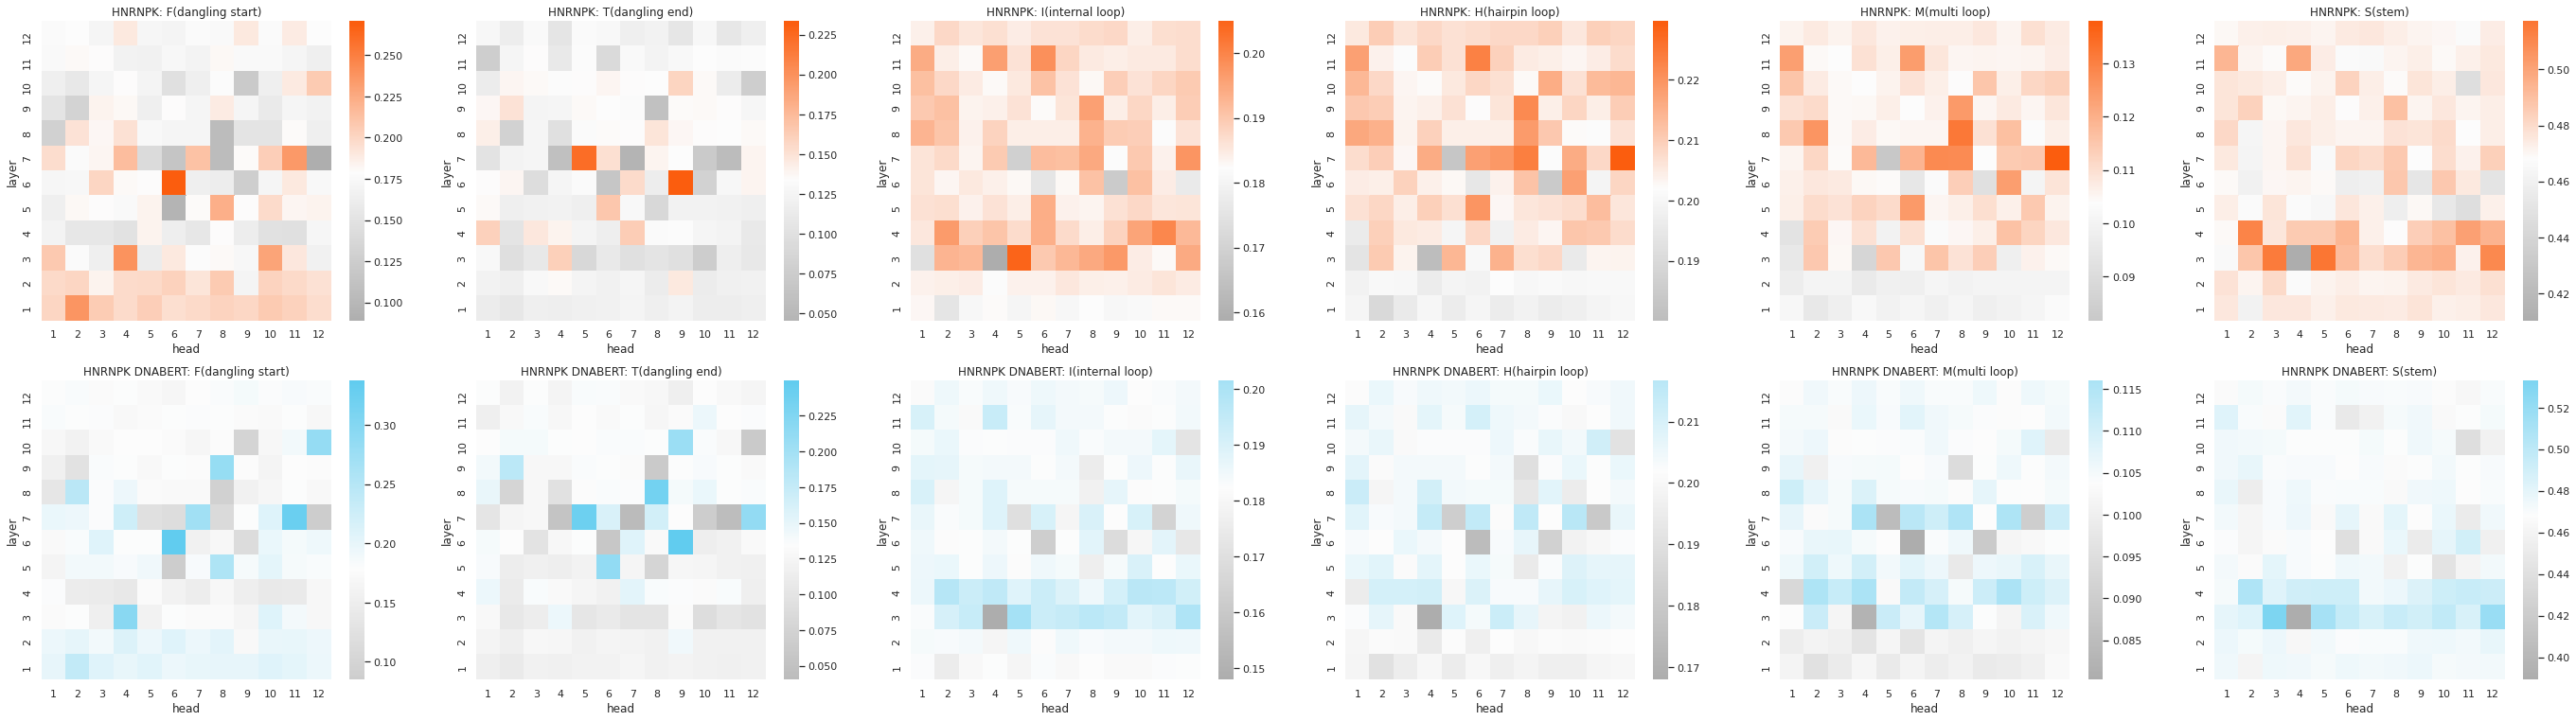

In [14]:
ax_i = 2
ax_j = len(structuretypes)
heatmap_xlabels = list(map(int, np.linspace(1,12,12)))
heatmap_ylabels = heatmap_xlabels[::-1]

for num_rbp, rbp in enumerate(rbps):
    fig, ax = plt.subplots(ax_i, ax_j, figsize=(ax_j*8, ax_i*6.4))
    filename = os.path.join(MASTER_DIR, rbp, SUBDIR, "analyze_rnastructure2.npy")

    rnastructure_matrix = np.load(filename)
    filename2 = os.path.join(MASTER_DIR_DNABERT, rbp, SUBDIR_DNABERT, "analyze_rnastructure2.npy")
    if os.path.exists(filename2):
        rnastructure_matrix2 = np.load(filename2)
    
    filename = os.path.join(MASTER_DIR, rbp, SUBDIR, "analyze_rnastructure_count_type0.npy")
    counts = np.load(filename)
    filename = os.path.join(MASTER_DIR, rbp, SUBDIR, "analyze_rnastructure_count_negative_type0.npy")
    counts = counts / (counts + np.load(filename))
    
    max_heads = []
    for i in range(len(structuretypes)):
        max_val = np.max(rnastructure_matrix[i])
        max_heads.append((np.where(rnastructure_matrix[i]==max_val)[0][0]+1, np.where(rnastructure_matrix[i]==max_val)[1][0]+1))
        sns.heatmap(np.flip(rnastructure_matrix[i], axis=0), ax =ax[0,i], \
                    cmap="bertrbp_single_bertrbp_seq", center=counts[i])
        ax[0,i].set_xlabel("head")
        ax[0,i].set_ylabel("layer")
        ax[0,i].set_xticklabels(heatmap_xlabels)
        ax[0,i].set_yticklabels(heatmap_ylabels)
        ax[0,i].set_title("{}: {}".format(rbp, structuretypes[i]))
        if os.path.exists(filename2):
            sns.heatmap(np.flip(rnastructure_matrix2[i], axis=0), ax =ax[1,i], \
                        cmap="bertrbp_single_bertdnabert_seq", center=counts[i])
        ax[1,i].set_xlabel("head")
        ax[1,i].set_ylabel("layer")
        ax[1,i].set_xticklabels(heatmap_xlabels)
        ax[1,i].set_yticklabels(heatmap_ylabels)
        ax[1,i].set_title("{} DNABERT: {}".format(rbp, structuretypes[i]))

    fig.patch.set_alpha(0)

### 7. Visualize RNA secondary structure analysis (in detail)
You can visualize multiple RBPs at one time by specifying their names in `rbps`. `SUBDIR` and `SUBDIR_DNABERT` are where you have saved the results of region type analysis. Uncomment `BERTRBP_OR_DNABERT = "DNABERT"` to visualize the results for DNABERT

In [15]:
#RBPS=('EWSR1', 'FUS', 'HNRNPK', 'RBM22', 'SRSF1', 'SRSF9', 'TAF15', 'TIA1', 'TIAL1')
RBPS=('HNRNPK',)
structuretypes = ("F (dangling start)", "T (dangling end)", "I (internal loop)", "H (hairpin loop)", "M (multi loop)", "S (stem)")
SUBDIR = "finetuned_model/analyze_rnastructure"
SUBDIR_DNABERT = "analyze_rnastructure"
NUM_SPLIT = 3
VOLUME_PERCENT = 0.995
BERTRBP_OR_DNABERT = "BERTRBP"

HNRNPK
HNRNPK
HNRNPK
HNRNPK


<Figure size 432x288 with 0 Axes>

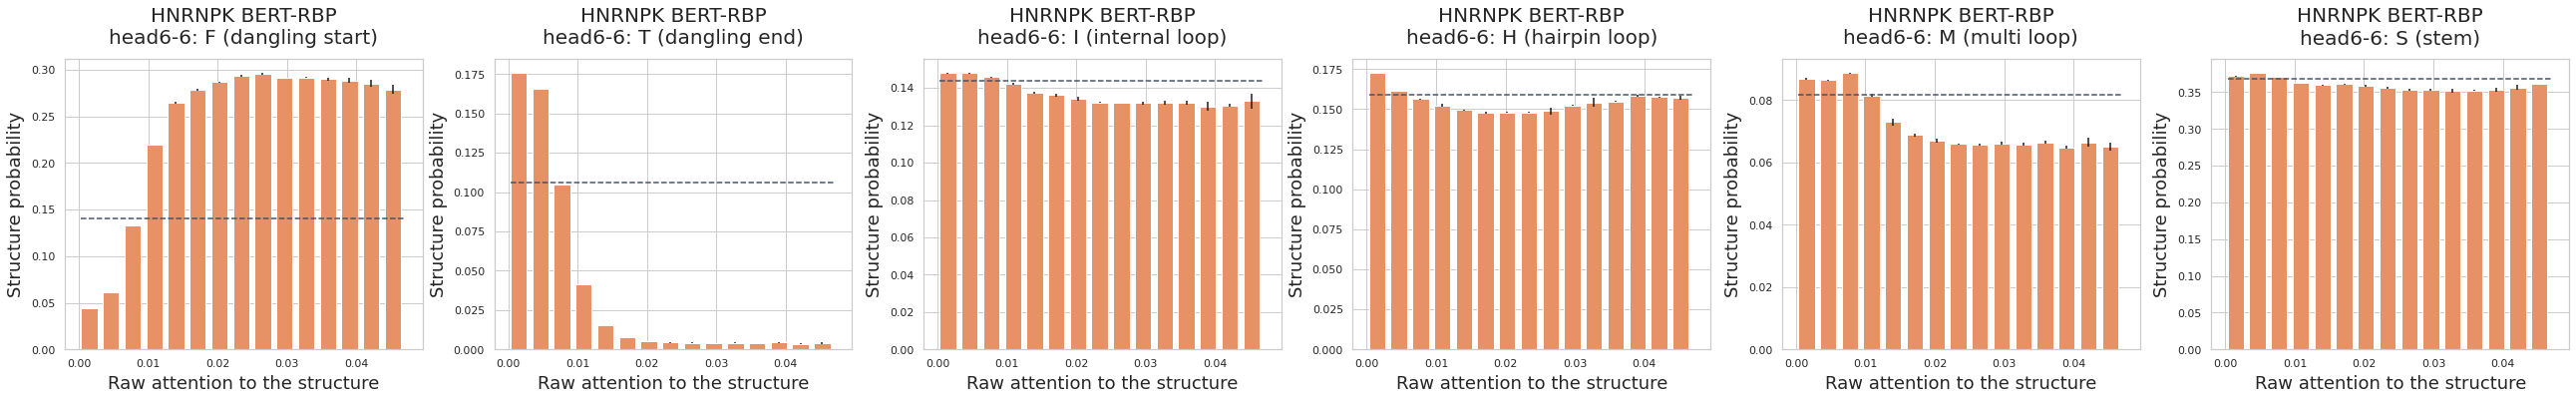

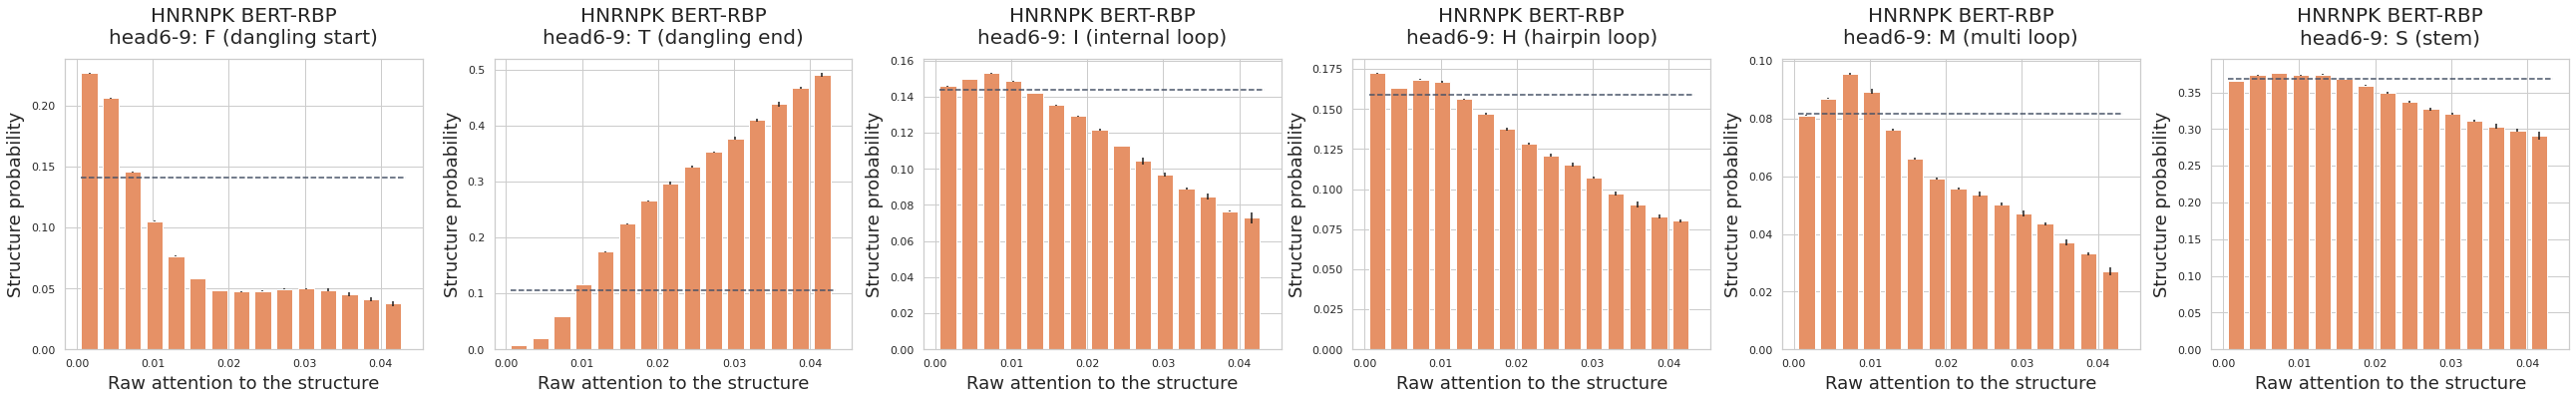

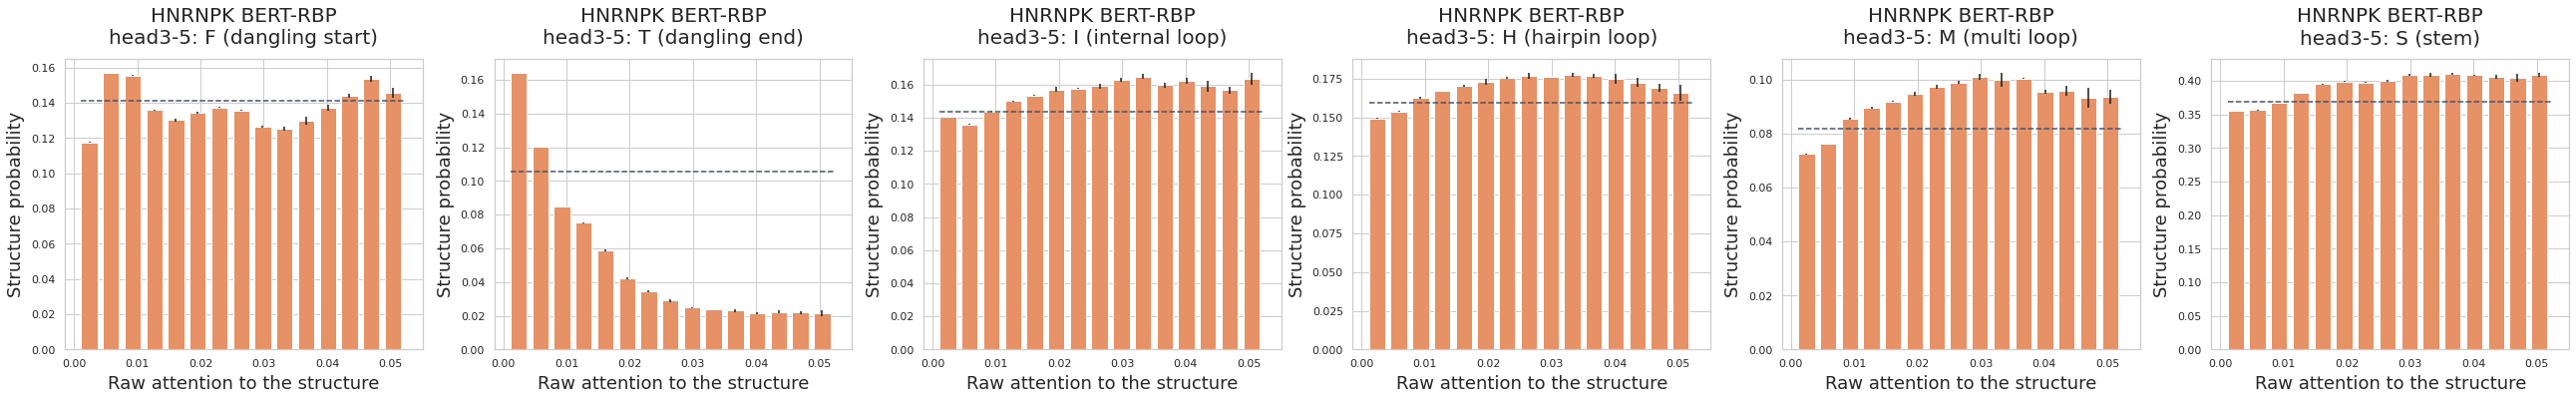

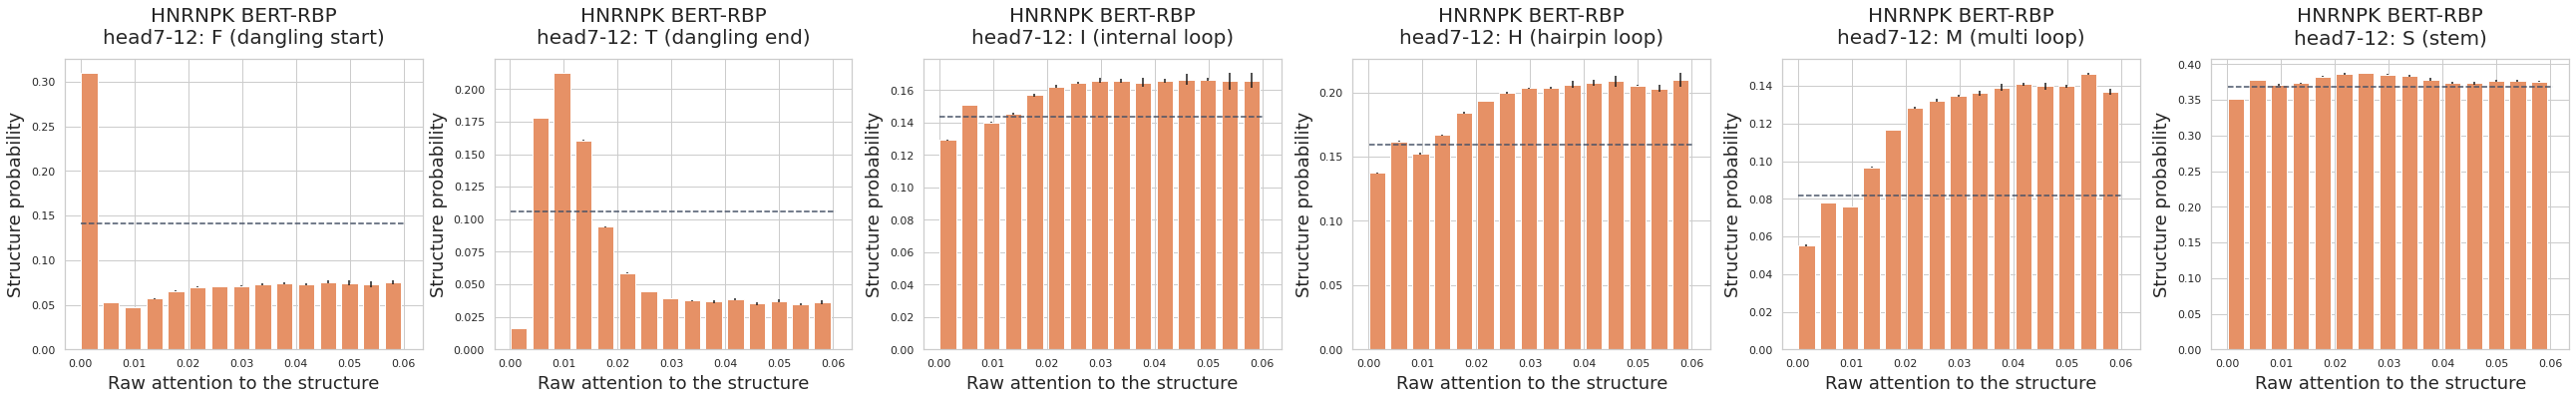

In [16]:
for RBP in RBPS:
    textfile = os.path.join(MASTER_DIR, rbp, SUBDIR, "analyze_rnastructure.txt")
    heads = []
    with open(textfile, 'r') as f:
        for line in f:
            head = []
            if re.search("max_head: [0-9\-]+", line):
                max_head = re.findall("max_head: [0-9\-]+", line)[0]
                head = [int(i) for i in re.findall("[0-9]+", max_head)]
                heads.append(head)
    rbps= [RBP] * len(heads)

    ax_i = 1
    ax_j = len(structuretypes)
    heatmap_xlabels = list(map(int, np.linspace(1,12,12)))
    heatmap_ylabels = heatmap_xlabels[::-1]

    sns.set()
    sns.set_style("whitegrid", {'grid.linestyle': '-'})
    sns.despine()

    for num_rbp, rbp in enumerate(rbps):
        fig, ax = plt.subplots(ax_i, ax_j, figsize=(ax_j*7.5, ax_i*6))
        filename = os.path.join(MASTER_DIR, rbp, SUBDIR, "analyze_rnastructure_specific_layer{}_head{}.tsv".format(heads[num_rbp][0], heads[num_rbp][1]))
        if BERTRBP_OR_DNABERT == "DNABERT":
            filename = os.path.join(MASTER_DIR_DNABERT, rbp, SUBDIR_DNABERT, "analyze_rnastructure_specific_layer{}_head{}.tsv".format(heads[num_rbp][0], heads[num_rbp][1]))
        df_data = pd.read_csv(filename, sep="\t")
        print(rbp)

        num_bins= 15
        q_low = 0
        q_high = VOLUME_PERCENT
        quantiles = df_data["attention"].quantile([q_low, q_high])
        attention_max = quantiles[q_high]
        attention_min = quantiles[q_low]
        attention_thresh = np.linspace(attention_min, attention_max, num_bins+1)
        background = np.zeros(len(structuretypes))
        for structuretype in range(len(structuretypes)):
            tmp1 = (df_data["structure"] == float(structuretype))
            background[structuretype] = tmp1.sum()
        background = background / np.sum(background)

        counts = np.zeros([NUM_SPLIT, len(structuretypes), num_bins])
        fracs = np.linspace(0,1,NUM_SPLIT+1) * len(df_data)
        fracs = list(map(int, fracs))
        for num_split, frac in enumerate(fracs[1:]):
            frac = frac - fracs[num_split]
            count = np.zeros([len(structuretypes), num_bins])
            len_df_data = len(df_data)
            df_data_split = 0
            if num_split==NUM_SPLIT-1:
                df_data_split = df_data
            else:
                df_data_split = df_data.sample(n=frac, random_state=0)
            df_data = df_data.drop(df_data_split.index)
            df_data_split = np.array(df_data_split)
            for i in range(1, len(attention_thresh)):
                tmp1 = df_data_split[:, 1]
                tmp2 = df_data_split[np.where(tmp1 > attention_thresh[i-1])]
                tmp1 = tmp1[np.where(tmp1 > attention_thresh[i-1])]
                tmp2 = tmp2[np.where(tmp1 <= attention_thresh[i])]
                tmp1 = tmp2[:, 0]
                for structuretype in range(len(structuretypes)):
                    count[structuretype, i-1] = len(np.where(tmp1==structuretype)[0]) / len(tmp1)
            counts[num_split] = count
        stds = np.std(counts, axis=0)
        counts = np.mean(counts, axis=0)

        for num_structure, structure in enumerate(structuretypes):
            background_x = [attention_min, attention_max]
            background_y = [background[num_structure]] * 2

            y_value = counts[num_structure]
            if NUM_SPLIT==1:
                ax[num_structure].bar(attention_thresh[:-1], y_value, width=(attention_max-attention_min)*0.05, align="edge", color="#e69166")
            else:
                y_err = stds[num_structure]
                if BERTRBP_OR_DNABERT == "BERTRBP":
                    ax[num_structure].bar(attention_thresh[:-1], y_value, yerr=y_err, width=(attention_max-attention_min)*0.05, align="edge", color="#e69166")
                elif BERTRBP_OR_DNABERT == "DNABERT":
                    ax[num_structure].bar(attention_thresh[:-1], y_value, yerr=y_err, width=(attention_max-attention_min)*0.05, align="edge", color="#7bbfd5")
                
            ax[num_structure].set_xlabel("Raw attention to the structure", fontsize=18, labelpad=6)
            ax[num_structure].set_ylabel("Structure probability", fontsize=18, labelpad=6)
            if BERTRBP_OR_DNABERT == "BERTRBP":
                ax[num_structure].set_title("{} BERT-RBP\nhead{}-{}: {}".format(rbp, heads[num_rbp][0], heads[num_rbp][1], structuretypes[num_structure]), fontsize=20, x=0.5, y=1.03)
            elif BERTRBP_OR_DNABERT == "DNABERT":
                ax[num_structure].set_title("{} DNABERT\nhead{}-{}: {}".format(rbp, heads[num_rbp][0], heads[num_rbp][1], structuretypes[num_structure]), fontsize=20, x=0.5, y=1.03)
            ax[num_structure].plot(background_x, background_y, '--', label="background", color="#475267")
            
        fig.subplots_adjust(top=0.8)
        fig.patch.set_alpha(0)
        fig.savefig("graph_2dstructure_{}_{}_head{}-{}.eps".format(rbp, BERTRBP_OR_DNABERT, heads[num_rbp][0], heads[num_rbp][1]), dpi=350)